## Examen 3er parcial - Karime Jiménez Romero

Ejercicio 4. Para los datos de 'Coactivation_matrix.mat', filtre la matriz para obtener los valores > 0.2, con el nuevo arreglo muestre los nodos y vértices del grafo

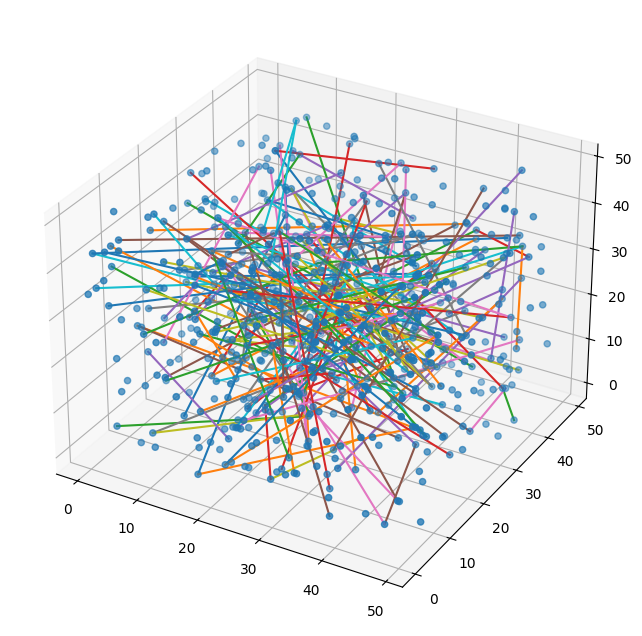

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import networkx as nx
from matplotlib import animation
math_path = r"C:\Users\karim\OneDrive\Documentos\Python Scripts\Coactivation_matrix.mat"
contents2 = scipy.io.loadmat(math_path)

adj_matrix = contents2 ['Coactivation_matrix']

adj_matrix[adj_matrix <= 0.2] = 0
G = nx.from_numpy_array(adj_matrix)
num_nodes = G.number_of_nodes()
x = np.random.randint(0, 50, size=num_nodes)
y = np.random.randint(0, 50, size=num_nodes)
z = np.random.randint(0, 50, size=num_nodes)

nodes = np.array([[i, j, k] for i, j, k in zip(x, y, z)])
edges = np.array([(nodes[u], nodes[v]) for u, v in G.edges()])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

def init():
    ax.scatter(*nodes.T)
    for edge in edges:
        ax.plot(*edge.T)
    return fig,

def animate(i):
    ax.view_init(elev=20, azim=i * 4)
    return fig,

from matplotlib import animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=200, blit=False)
